# Principle Component Analysis - PCA is a dimension reduction technique.
---

step 1 : 均值归一化  
step 2 : 计算协方差矩阵（covariance matrix）$\Sigma = \frac{1}{m} \sum\limits_{i=1}^{n}(x^{(i)})(x^{(i)})^T = X^TX/m$  
step 3 : 计算协方差矩阵Σ的特征向量（eigenvectors）,Octave 可用奇异值分解（singular value decomposition）来求解  [U, S, V] = svd($\Sigma$)  

In [4]:
function [X_norm, mu, sigma] = featureNormalize(X)
mu = mean(X);
X_norm = bsxfun(@minus, X, mu);
sigma = std(X_norm);
X_norm = bsxfun(@rdivide, X_norm, sigma);
end

In [5]:
function [U, S] = pca(X)
[m, n] = size(X);
U = zeros(n);
S = zeros(n);
Sigma = X' * X / m;
[U,S,V] = svd(Sigma);
end

In [6]:
function drawLine(p1, p2, varargin)
plot([p1(1) p2(1)], [p1(2) p2(2)], varargin{:});
end

In [7]:
function X_rec = recoverData(Z, U, K)
%% Recovers an approximation of the original data when using the projected data
X_rec = zeros(size(Z, 1), size(U, 1));
% Compute the approximation of the data by projecting back onto the original space using the top K eigenvectors in U.
% For the i-th example Z(i,:), the (approximate) recovered data for dimension j is given as follows:
%  v = Z(i, :)';
%  recovered_j = v' * U(j, 1:K)';
% Notice that U(j, 1:K) is a row vector.
X_rec = Z * U(:,1:K)'; % Recover Data
end

In [8]:
function Z = projectData(X, U, K)
%% Computes the reduced data representation when projecting only on to the top k eigenvectors
Z = zeros(size(X, 1), K);
% Compute the projection of the data using only the top K eigenvectors in U (first K columns). 
% For the i-th example X(i,:), the projection on to the k-th eigenvector is given as follows:
%   x = X(i, :)';
%   projection_k = x' * U(:, k);
U_reduce = U(:, 1:K); Z = X * U_reduce; % Project Data
end

In [9]:
function plotDataPoints(X, idx, K)
%% Plots data points in X, coloring them so that those with the same index assignments in idx have the same color
palette = hsv(K + 1); % Create palette
colors = palette(idx, :);
scatter(X(:,1), X(:,2), 15, colors); % Plot the data
end

In [10]:
function [h, display_array] = displayData(X, example_width)
%DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
	for i = 1:display_cols
		if curr_ex > m, 
			break; 
		end
		% Copy the patch
		
		% Get the max value of the patch
		max_val = max(abs(X(curr_ex, :)));
		display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
		              pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
						reshape(X(curr_ex, :), example_height, example_width) / max_val;
		curr_ex = curr_ex + 1;
	end
	if curr_ex > m, 
		break; 
	end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end

In [15]:
clear ; close all; clc % Initialization

In [12]:
% We start this exercise by using a small dataset that is easily to visualize
% The following command loads the dataset. You should now have the variable X in your environment
load ('ex7data1.mat');

In [16]:
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        X          50x2                        800  double

Total is 100 elements using 800 bytes



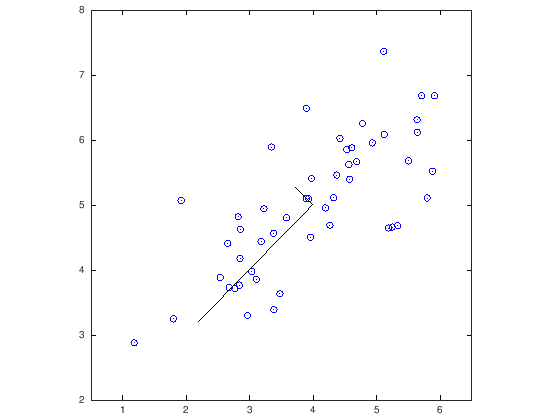

In [29]:
%  Visualize the example dataset
%% Running PCA on example dataset.
%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);
%  Run PCA
[U, S] = pca(X_norm);
%  Compute mu, the mean of the each feature
%  Draw the eigenvectors centered at mean of data. 
%  These lines show the directions of maximum variations in the dataset.

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;
hold on;
t1_mu = mu + 1.5 * S(1,1) * U(:,1)';
t2_mu = mu + 1.5 * S(2,2) * U(:,2)';
%drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
%drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
plot([mu(1) t1_mu(1)], [mu(2) t1_mu(2)], '-k', 'LineWidth', 1);
plot([mu(1) t2_mu(1)], [mu(2) t2_mu(2)], '-k', 'LineWidth', 1);
hold off;

In [18]:
S
1.70082/(1.70082+0.25918)

S =

Diagonal Matrix

   1.70082         0
         0   0.25918

ans =  0.86777


In [21]:
K = 1;
Z = projectData(X_norm, U, K);
X_rec  = recoverData(Z, U, K);

In [22]:
sum(X_norm - X_rec)

ans =

  -4.7018e-14   4.7407e-14



In [41]:
sum((X_norm - X_rec).^2) ./ sum(X_norm.^2)

ans =

   0.13223   0.13223



In [24]:
fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


In [1]:
%% =================== Part 3: Dimension Reduction ===================
%  You should now implement the projection step to map the data onto the 
%  first k eigenvectors. The code will then plot the data in this reduced 
%  dimensional space.  This will show you what the data looks like when 
%  using only the corresponding eigenvectors to reconstruct it.
%
%  You should complete the code in projectData.m

In [12]:
fprintf('\nDimension reduction on example dataset.\n\n');


Dimension reduction on example dataset.



Projection of the first example: 1.481274

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



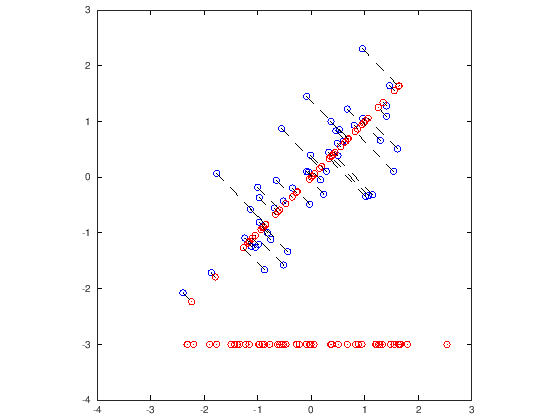

In [43]:
%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
plot(Z, -3, 'ro');
for i = 1:size(X_norm, 1)
	%drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
	plot([X_norm(i, 1) X_rec(i, 1)], [X_norm(i, 2) X_rec(i, 2)], '--k', 'LineWidth', 1);
    %plot([p1(1) p2(1)], [p1(2) p2(2)], varargin{:});
end
hold off

In [18]:
%% =============== Part 4: Loading and Visualizing Face Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  The following code will load the dataset into your environment

In [19]:
fprintf('\nLoading face dataset.\n\n');


Loading face dataset.



In [19]:
%  Load Face dataset
load ('ex7faces.mat')

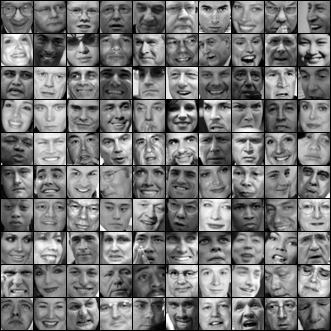

In [20]:
%  Display the first 100 faces in the dataset
displayData(X(1:100, :));

In [21]:
%% =========== Part 5: PCA on Face Data: Eigenfaces  ===================
%  Run PCA and visualize the eigenvectors which are in this case eigenfaces
%  We display the first 36 eigenfaces.

In [22]:
fprintf(['\nRunning PCA on face dataset.\n' ...
         '(this might take a minute or two ...)\n\n']);


Running PCA on face dataset.
(this might take a minute or two ...)



In [23]:
%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

In [24]:
%  Run PCA
[U, S] = pca(X_norm);

In [28]:
size(U(:, 1:36))

ans =

   1024     36



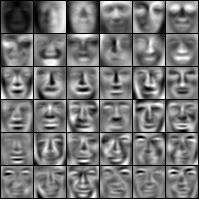

In [25]:
%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

In [29]:
%% ============= Part 6: Dimension Reduction for Faces =================
%  Project images to the eigen space using the top k eigenvectors 
%  If you are applying a machine learning algorithm 

In [30]:
fprintf('\nDimension reduction for face dataset.\n\n');


Dimension reduction for face dataset.



In [31]:
K = 100;
Z = projectData(X_norm, U, K);

In [32]:
fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));

The projected data Z has a size of: 
5000 100 
The projected data Z has a size of: 5000 100 


In [33]:
%% ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
%  Project images to the eigen space using the top K eigen vectors and visualize only using those K dimensions
%  Compare to the original input, which is also displayed

In [34]:
fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');


Visualizing the projected (reduced dimension) faces.



In [35]:
K = 100;
X_rec  = recoverData(Z, U, K);

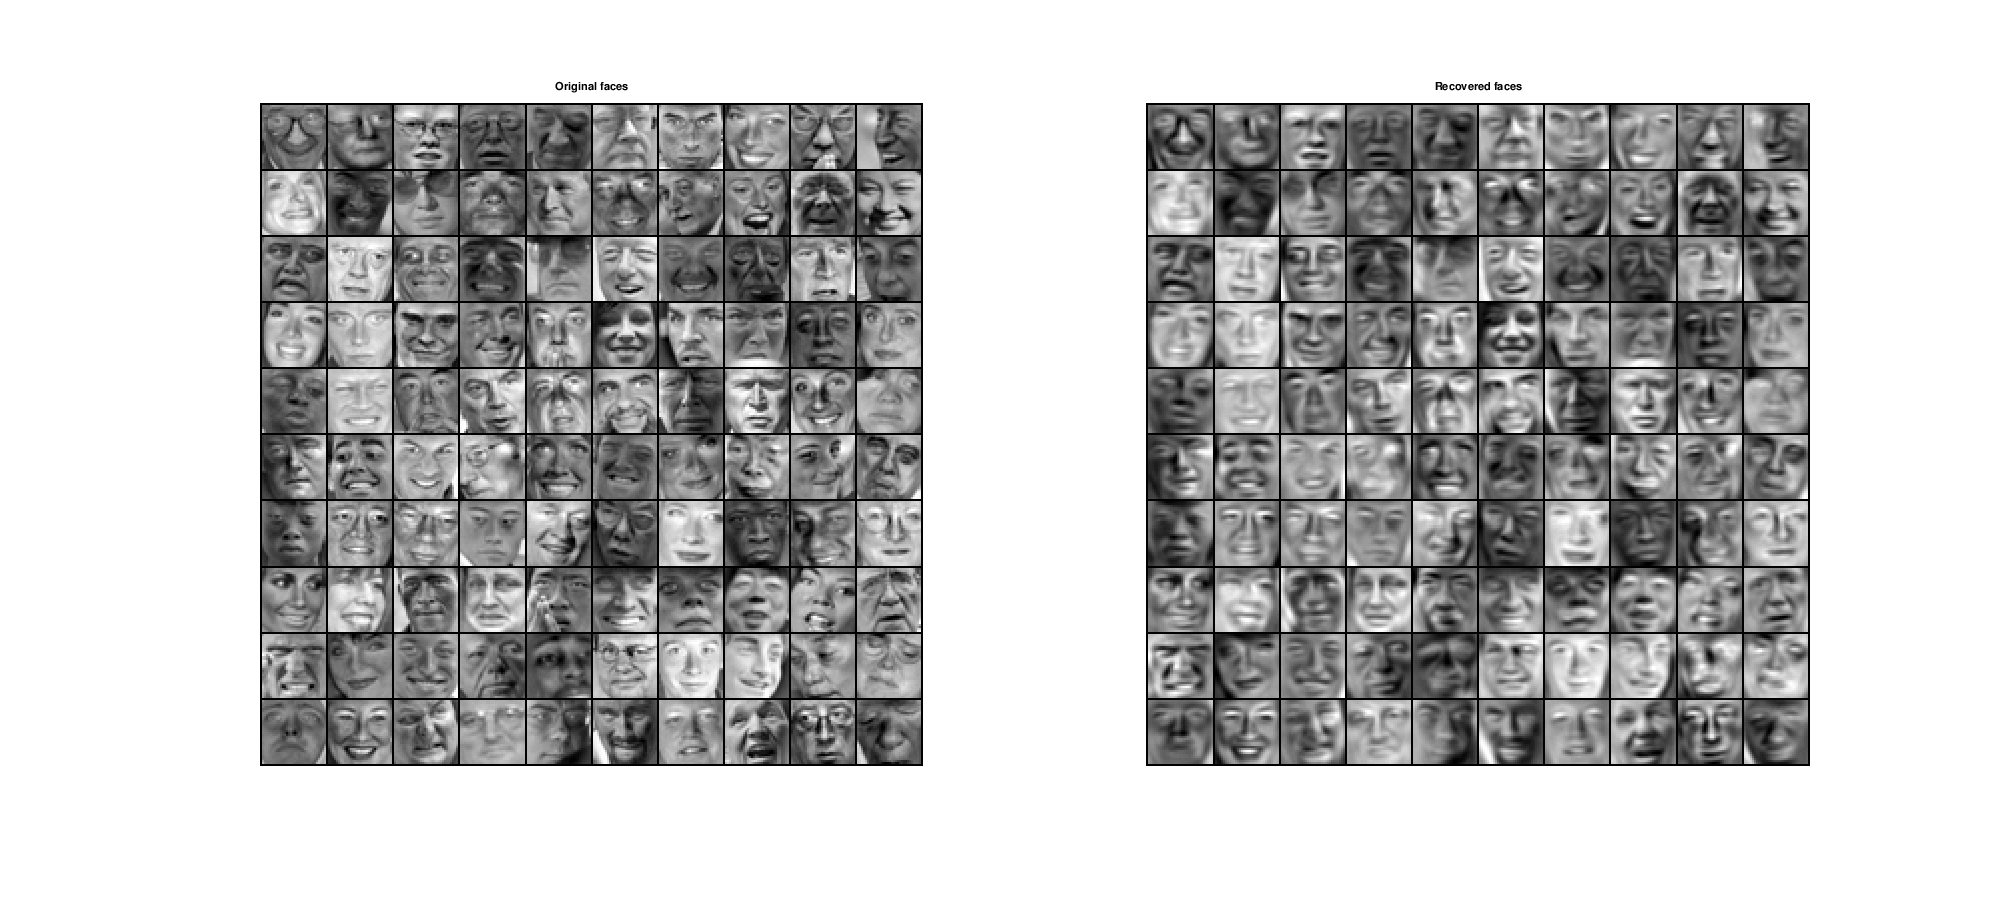

In [36]:
figure(1, 'position',[1,1,2000,900]);
% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

In [37]:
%% === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
%  One useful application of PCA is to use it to visualize high-dimensional
%  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
%  pixel colors of an image. We first visualize this output in 3D, and then
%  apply PCA to obtain a visualization in 2D.

In [28]:
function idx = findClosestCentroids(X, centroids)
K = size(centroids, 1);
idx = zeros(size(X,1), 1);
value=zeros(K,1);
for i=1:size(X,1)
	for j=1:K
		value(j)=sum((X(i,:)-centroids(j,:)) .^ 2);
	end;
	[val,ind]=min(value);
	idx(i)=ind;
end;
end

In [29]:
function centroids = computeCentroids(X, idx, K)
[m n] = size(X);
centroids = zeros(K, n);
for i=1:K
	temp=find(idx==i);
	centroids(i,:)=sum(X(temp,:))/size(X(temp,:),1);
end;
end

In [30]:
function [centroids, idx] = runkMeans(X, initial_centroids, max_iters, plot_progress)
%% Runs the K-Means algorithm on data matrix X, where each row of X is a single example
if ~exist('plot_progress', 'var') || isempty(plot_progress)
	plot_progress = false; % Set default value for plot progress
end;
if plot_progress % Plot the data if we are plotting progress
	figure;
	hold on;
end;
[m n] = size(X); % Initialize values
K = size(initial_centroids, 1);
centroids = initial_centroids;
previous_centroids = centroids;
idx = zeros(m, 1);
for i=1:max_iters % Run K-Means
	if exist('OCTAVE_VERSION')
		fflush(stdout);
	end;
	idx = findClosestCentroids(X, centroids); % For each example in X, assign it to the closest centroid
	if plot_progress % Optionally, plot progress here
		plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
		previous_centroids = centroids;
	end;
	centroids = computeCentroids(X, idx, K); % Given the memberships, compute new centroids
	fprintf(['K-Means iteration %d/%d\t','%s \n'], i, max_iters, mat2str(centroids, [5 5]));
end;
if plot_progress % Hold off if we are plotting progress
	hold off;
end;
end

In [31]:
function centroids = kMeansInitCentroids(X, K)
%% This function initializes K centroids that are to be used in K-Means on the dataset X
centroids = zeros(K, size(X, 2));
% ou should set centroids to randomly chosen examples from the dataset X
% Initialize the centroids to be random examples
% Randomly reorder the indices of examples 
randidx = randperm(size(X, 1)); 
% Take the first K examples as centroids 
centroids = X(randidx(1:K), :);
end

In [40]:
close all; close all; clc

In [41]:
% Reload the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = double(imread('bird_small.png'));

In [34]:
% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

In [35]:
A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10	[0.55845 0.49063 0.46323;0.96322 0.96838 0.89905;0.45956 0.35767 0.30396;0.9844 0.90837 0.71935;0.77149 0.59427 0.32352;0.13401 0.13903 0.12881;0.48801 0.35359 0.16178;0.82803 0.80597 0.79309;0.96003 0.83861 0.59418;0.61198 0.60616 0.66756;0.98911 0.96252 0.8083;0.93361 0.70604 0.41625;0.066995 0.072767 0.062356;0.81117 0.71462 0.56475;0.085291 0.09318 0.085156;0.25463 0.25915 0.28186] 
K-Means iteration 2/10	[0.55787 0.48736 0.45868;0.96294 0.96769 0.90359;0.45376 0.36872 0.32116;0.97935 0.89925 0.71445;0.76531 0.57526 0.30093;0.14951 0.15283 0.14372;0.526 0.37716 0.16828;0.8073 0.77853 0.79577;0.95608 0.83449 0.58767;0.5864 0.60705 0.68331;0.98905 0.96088 0.80625;0.90068 0.70145 0.41337;0.065217 0.071005 0.060863;0.79728 0.69775 0.53824;0.091463 0.098878 0.088401;0.27016 0.25243 0.25792] 
K-Means iteration 3/10	[0.566 0.49153 0.45803;0.96099 0.96669 0.90392;0.44142 0.36846 0.33429;0.9769 0.89282 0.71003;0.76346 0.564 0.28606;0.15769 0.16033 0.15185;0.54709 0.39

In [36]:
%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

In [37]:
%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

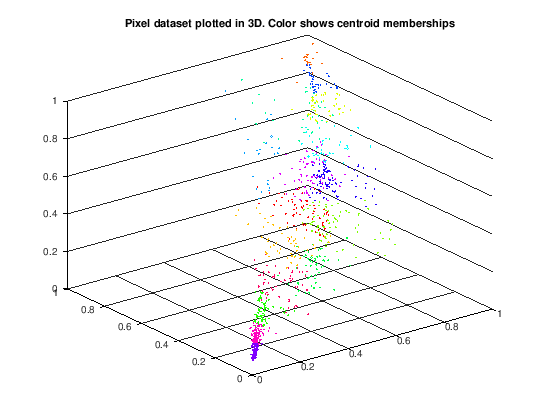

In [38]:
%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');

In [39]:
%% === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
% Use PCA to project this cloud to 2D for visualization

In [40]:
% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

In [41]:
% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

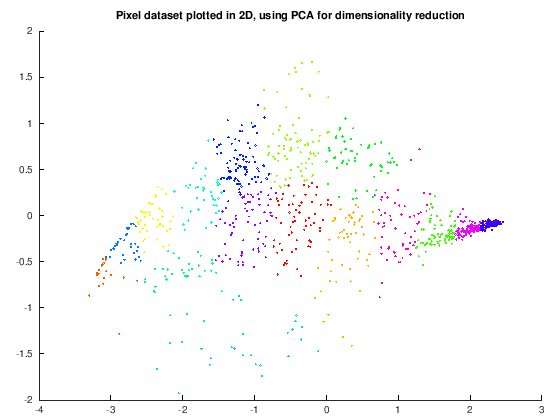

In [44]:
% Plot in 2D
figure;
%plotDataPoints(Z(sel, :), idx(sel), K);

%% Plots data points in Z, coloring them so that those with the same index assignments in idx have the same color
palette = hsv(K + 1); % Create palette
colors = palette(idx(sel), :);
%scatter(X(:,1), X(:,2), 15, colors); % Plot the data
scatter(Z(sel, 1), Z(sel, 2), 15, colors); % Plot the data

title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');